In [20]:
from comut import comut
from comut import fileparsers
import palettable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def readfile(path,filename):
    df = pd.read_csv(path+filename,header=0,sep='\t',skipinitialspace=True)
    return df
def rename_cols(df,oldname,newname):
    df.rename(columns={oldname:newname},inplace=True)
    return df
def annon(df1,string,df2):
    df_annon = pd.merge(df1,df2,on=string)

In [40]:
def rename_rows(g):
    return '\t'.join(g.types + '-' + g._merge) 

In [3]:
path                  = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/filtered_results/'
chrompath             = "/home/alva/Documents/lncRNAs_project_2020/MEG3/"
depath                = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/'
methy                 = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/'
cancer_lncRNAs_census = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/autoencoder_lncRNAs/data/'

In [63]:
pathways            = readfile(path,"cis_onco_pathways_ann_cols")
common_de           = readfile(path,"commonDE_5cancermetainformation")
triplex             = readfile(depath,"tripleFPP_triplex_genecode")
Methylated          = readfile(methy,'methylated_lncRNAs')
clc                 = readfile(cancer_lncRNAs_census,"lncRNA_CLC")

In [64]:
clc = clc[["NAME AS PUBLISHED","Oncogene (o) or Tumour Supp(t)"]]
clc = rename_cols(clc,"NAME AS PUBLISHED","gene_sym")
clc = rename_cols(clc,"Oncogene (o) or Tumour Supp(t)","types")

In [60]:
common_de["sample"] = common_de["filename"].apply(lambda x:x.split("-")[1])

In [6]:
meth       = Methylated[["Gene","sample","Corr_Coeff","Pval","Meth_Mean","Expr_Mean"]]
meth       = rename_cols(meth,"Gene","gene_sym")

/home/alva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
triplex     = rename_cols(triplex,"gene_sym_y","gene_sym")
triplex_clc = pd.merge(triplex['gene_sym'], clc, on='gene_sym', how='outer', indicator=True)
triplex_clc['_merge'] = triplex_clc['_merge'].replace(['left_only','right_only'],['triplex','clc'])
triplex_clc           = triplex_clc.replace(np.nan, 'only', regex=True)
clc_triplex=triplex_clc.groupby("gene_sym").apply(rename_rows).to_frame(name="new_2")
clc_triplex.reset_index(inplace=True)

In [77]:
clc_triplex_ann =pd.merge(pathways,clc,on='gene_sym')
clc_triplex_ann

,Pathway,gene_sym,types
0,NOTCH,CTBP1-AS,o
1,NOTCH,MEG3,t
2,RTK-RAS,EGFR-AS1,o


In [66]:
EZH2  = readfile(chrompath,"EZH2_enriched_lncRNAs")
EZH2  = rename_cols(EZH2,"GeneSymbol","gene_sym")
H3K27 = readfile(chrompath,"H3k27_enriched_lncRNAs")
H3K27 = rename_cols(H3K27,"GeneSymbol","gene_sym")

In [67]:
EZH2.head()

,Location,Class,gene_sym,logFC
0,chr15:102291234-102334505,processed_transcript,CTD-2611K5.6,5.569320
1,chr7:131594978-131633712,processed_transcript,AC009518.5,5.286550
2,chr6:45541082-45544507,processed_transcript,RP1-166H4.2,5.121238
3,chr8:61297146-61429354,processed_transcript,RP11-163N6.2,4.934502
4,chr16:88112766-88120989,processed_transcript,RP11-863P13.5,4.467824


In [261]:
#common_de.drop(['filename','negative_correlated_methylation','positive_correlated_methylation'],inplace=True,axis=1)
colorder            = ['gene_sym','sample','proximal_cancer_driver','proximal_drug_target','triplex','promoter_methylated','SNPS']
common_de           = common_de[colorder]
common_de_melt      = pd.melt(common_de,id_vars=['gene_sym','sample'],var_name='category',value_name='value')
#common_de_melt     = common_de_melt.query('value =="Yes"')
common_de_data      = common_de_melt[["gene_sym","sample"]]
common_de_data      = pd.merge(common_de_data,pathways,on="gene_sym")

In [71]:
common_de_data_EZH   = pd.merge(EZH2[["gene_sym","logFC"]],common_de_data,on="gene_sym")
common_de_data_H3K27 = pd.merge(H3K27[["gene_sym","logFC"]],common_de_data,on="gene_sym")
common_de_data_H3K27

,gene_sym,logFC,sample,Pathway
0,MEG3,2.675827,BRCA,NOTCH
1,MEG3,2.675827,KICH,NOTCH
2,MEG3,2.675827,KIRP,NOTCH
3,MEG3,2.675827,LUAD,NOTCH
4,MEG3,2.675827,PRAD,NOTCH
5,MEG3,2.675827,STAD,NOTCH
6,MEG3,2.675827,BRCA,NOTCH
7,MEG3,2.675827,KICH,NOTCH
8,MEG3,2.675827,KIRP,NOTCH
9,MEG3,2.675827,LUAD,NOTCH


In [92]:
common_de_data        = rename_cols(common_de_data,"sample","category")
common_de_data        = rename_cols(common_de_data,"gene_sym","sample")
common_de_data        = rename_cols(common_de_data,"Pathway","value")
common_de_data_sorted = common_de_data.sort_values(by =['sample'] )
common_de_data_sorted = common_de_data_sorted.drop_duplicates()

In [243]:
promoter_methy_lncRNAs    = pd.read_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/promoter_methylated_lncRNAs',sep='\t',header=0,skipinitialspace=True)
promoter_methy_lncRNAs    = promoter_methy_lncRNAs[["Gene","Corr_Coeff"]]
promoter_methy_lncRNAs    = rename_cols(promoter_methy_lncRNAs,"Gene","sample")
promo_bar                 = pd.merge(promoter_methy_lncRNAs,common_de_data_sorted['sample'],on='sample')
#promoter_methy_lncRNAs.sort_values(by=['Corr_Coeff'])
promo_bar

,sample,Corr_Coeff
0,MYCNOS,-0.4597
1,MYCNOS,-0.4597
2,MYCNOS,-0.4597
3,MYCNOS,-0.4597
4,MYCNOS,-0.4597
5,MYCNOS,-0.4597
6,MYCNOS,-0.4597
7,MYCNOS,-0.4597
8,MYCNOS,-0.4597
9,MYCNOS,-0.2198


In [244]:
promo_bar.sort_values('Corr_Coeff').drop_duplicates('sample', keep='last')

,sample,Corr_Coeff
17,MYCNOS,-0.2198


In [228]:
common_de_data_sorted.shape

(593, 3)

In [259]:
cancer_driver = common_de[["gene_sym","proximal_cancer_driver"]].drop_duplicates()
cancer_driver = rename_cols(cancer_driver,"gene_sym","sample")
cancer_driver = rename_cols(cancer_driver,"proximal_cancer_driver","value")
cancer_driver["category"] ="cancer driver"
cancer_driver_plot = pd.merge(common_de_data_sorted['sample'],cancer_driver,on='sample')
cancer_driver_plot.drop_duplicates(inplace=True)
cancer_driver_plot

,sample,value,category
0,AC004846.1,No,cancer driver
7,AC005089.1,No,cancer driver
19,AC005785.1,No,cancer driver
25,AC006033.2,No,cancer driver
31,AC008115.3,No,cancer driver
...,...,...,...
563,PTOV1-AS2,No,cancer driver
571,RASGRF2-AS1,No,cancer driver
576,STK4-AS1,No,cancer driver
581,TSPOAP1-AS1,No,cancer driver


In [310]:
feature_bar        = common_de_data[["gene_sym"]]
feature_bar.drop_duplicates(inplace =True)
common_de_features = pd.merge(feature_bar,common_de,on="gene_sym")
#common_de_features = common_de_features.query('proximal_cancer_driver =="Yes"or proximal_drug_target =="Yes"|triplex =="Yes"|promoter_methylated=="Yes"|SNPS=="Yes"')
common_de_features.drop(['sample'],axis=1,inplace=True)
#common_de_features.drop_duplicates(inplace=True)
common_de_features = pd.melt(common_de_features,id_vars=['gene_sym'],var_name='category',value_name='value')
common_de_features = common_de_features.query('value=="Yes"').drop_duplicates()
common_de_features = common_de_features[["gene_sym","category"]]
common_de_features = rename_cols(common_de_features,"gene_sym","sample")
common_de_features = rename_cols(common_de_features,"category","value")
common_de_features["category"]="published evidence"
common_de_features

/home/alva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sample,value,category
78,AC011461.1,proximal_cancer_driver,published evidence
115,AC019080.1,proximal_cancer_driver,published evidence
175,AC079305.1,proximal_cancer_driver,published evidence
217,AC096921.2,proximal_cancer_driver,published evidence
1319,AC079305.1,triplex,published evidence
1488,AP001528.1,triplex,published evidence
1621,LINC01588,triplex,published evidence
1653,MEG3,triplex,published evidence
2231,MYCNOS,promoter_methylated,published evidence
2675,CASC11,SNPS,published evidence


In [291]:
aggregate_feat= common_de_features.groupby('gene_sym').category.agg([('count', 'count'), ('value', ', '.join)])

,gene_sym,count,value
0,AC011461.1,5,"proximal_cancer_driver, proximal_drug_target, ..."
1,AC019080.1,5,"proximal_cancer_driver, proximal_drug_target, ..."
2,AC079305.1,5,"proximal_cancer_driver, proximal_drug_target, ..."
3,AC096921.2,5,"proximal_cancer_driver, proximal_drug_target, ..."
4,AP001528.1,5,"proximal_cancer_driver, proximal_drug_target, ..."
5,CASC11,5,"proximal_cancer_driver, proximal_drug_target, ..."
6,CDKN2B-AS1,5,"proximal_cancer_driver, proximal_drug_target, ..."
7,LINC01588,5,"proximal_cancer_driver, proximal_drug_target, ..."
8,MEG3,5,"proximal_cancer_driver, proximal_drug_target, ..."
9,MYCNOS,5,"proximal_cancer_driver, proximal_drug_target, ..."


In [37]:
comon_de_triplex      = pd.merge(common_de[["sample","gene_sym"]],triplex["gene_sym"],on='gene_sym')

In [58]:
common_de_data_sorted.head(n=3)

,category,sample,value
0,AC004846.1,BRCA,NOTCH
2405,LINC00337,BRCA,NOTCH
2406,LINC00337,BRCA,RTK-RAS


In [38]:
comon_de_triplex_path = pd.merge(comon_de_triplex,pathways,on="gene_sym")
comon_de_triplex_path = rename_cols(comon_de_triplex_path,"sample","category")
comon_de_triplex_path = rename_cols(comon_de_triplex_path,"gene_sym","sample")
comon_de_triplex_path = rename_cols(comon_de_triplex_path,"Pathway","value")
comon_de_triplex_path_sorted = comon_de_triplex_path.sort_values(by =['sample'] )
comon_de_triplex_path_sorted = comon_de_triplex_path.drop_duplicates()
comon_de_triplex_path_sorted['sample'].drop_duplicates()

0     AC079305.1
5     AP001528.1
15     LINC01588
23          MEG3
Name: sample, dtype: object

In [205]:
comon_de_triplex_methy = pd.merge(meth,comon_de_triplex,on=['gene_sym','sample'])
comon_de_triplex_methy

,gene_sym,sample,Corr_Coeff,Pval,Meth_Mean,Expr_Mean
0,PVT1,COAD,-0.50670,0.000000e+00,0.270403,6.946125
1,PVT1,COAD,-0.50670,0.000000e+00,0.270403,6.946125
2,PVT1,COAD,-0.50670,0.000000e+00,0.270403,6.946125
3,PVT1,COAD,-0.50670,0.000000e+00,0.270403,6.946125
4,PVT1,COAD,-0.50670,0.000000e+00,0.270403,6.946125
...,...,...,...,...,...,...
1732,MEG3,BRCA,-0.27550,6.878000e-15,0.698805,5.727000
1733,MEG3,BRCA,-0.27550,6.878000e-15,0.698805,5.727000
1734,MEG3,BRCA,-0.27550,6.878000e-15,0.698805,5.727000
1735,DIO3OS,BRCA,0.03768,3.945000e-01,0.617796,0.090810


In [253]:
common_de_data_sorted = rename_cols(common_de_data_sorted,"sample","category")
common_de_data_sorted = rename_cols(common_de_data_sorted,"category","sample")


In [57]:
common_de_data_sorted

,category,sample,value
0,AC004846.1,BRCA,NOTCH
2405,LINC00337,BRCA,NOTCH
2406,LINC00337,BRCA,RTK-RAS
781,AC069148.1,BRCA,WNT
729,AC034198.2,BRCA,RTK-RAS
...,...,...,...
2152,DCXR-DT,THCA,NOTCH
1228,AC125807.2,THCA,Hippo
937,AC079760.2,THCA,WNT
2284,FZD10-AS1,THCA,WNT


In [111]:
forfig  = common_de_data_sorted
forfig  = rename_cols(forfig,"category","Gene")

In [ ]:
comon_de_triplex_sorted_bar =pd.merge()

In [99]:
forfig_meth = pd.merge(meth,forfig,on=["Gene"])
forfig_meth['Gene'].drop_duplicates()

0          MEG3
78       MYCNOS
159    LOH12CR2
Name: Gene, dtype: object

In [235]:
common_de_data.to_csv(path + "common_de_withonlyoncogeneicpathways",sep='\t',index=False)

figure paramters

In [99]:
vivid_10    = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
mut_mapping = {'proximal_cancer_driver': vivid_10[5], 'proximal_drug_target': vivid_10[0],
               'triplex': vivid_10[4], 'promoter_methylated': vivid_10[9],'SNPS': vivid_10[2],
               'negative_correlated_methylation':vivid_10[3],'positive_correlated_methylation':vivid_10[7]}
dpi         = 300 # change the output resolution
extension   = '.svg' # extension for saving - can otherwise be .pdf, .png, .jpg, etc
# You can provide a list of samples to order your comut (from left to right). If none is provided, it will be calculated from your MAF.
samples     = None
x_padding   = 0.01 # the x distance between patches in comut
y_padding   = 0.01 # the y distance between patches in comut
tri_padding = 0.01 # the distance between triangles in comut
dpi         = 300 # change the output resolution
extension   = '.svg'

In [158]:
test.query('sample=="AL353150.1"')

,sample,value,category
46907,AL353150.1,proximal_cancer_driver,RTK-RAS


In [100]:
bar_meth  = promoter_methylated[["Gene","Expr_Mean","Meth_Mean"]]
bar_meth.rename(columns={'Gene':'sample'}, inplace=True)
bar_meth  = pd.merge(test_data['sample'],bar_meth,on='sample')

/home/alva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


NameError: name 'test_data' is not defined

In [177]:
# mapping of mutation type to color. Only these mutation types are shown. Can be any valid matplotlib color, e.g. 'blue', #ffa500, or (1,1,1).
vivid_10      = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
balance_6     = palettable.cmocean.diverging.Balance_6.mpl_colors
driver = {'Yes': vivid_10[0], 'No':  vivid_10[8]}
features     = {'SNPS': vivid_10[5],  'promoter_methylated': vivid_10[0], 'proximal_drug_target': vivid_10[1],
                 'triplex': vivid_10[4],  'proximal_cancer_driver': vivid_10[9]}

In [ ]:
# plot for common de accross all tumors and pathways

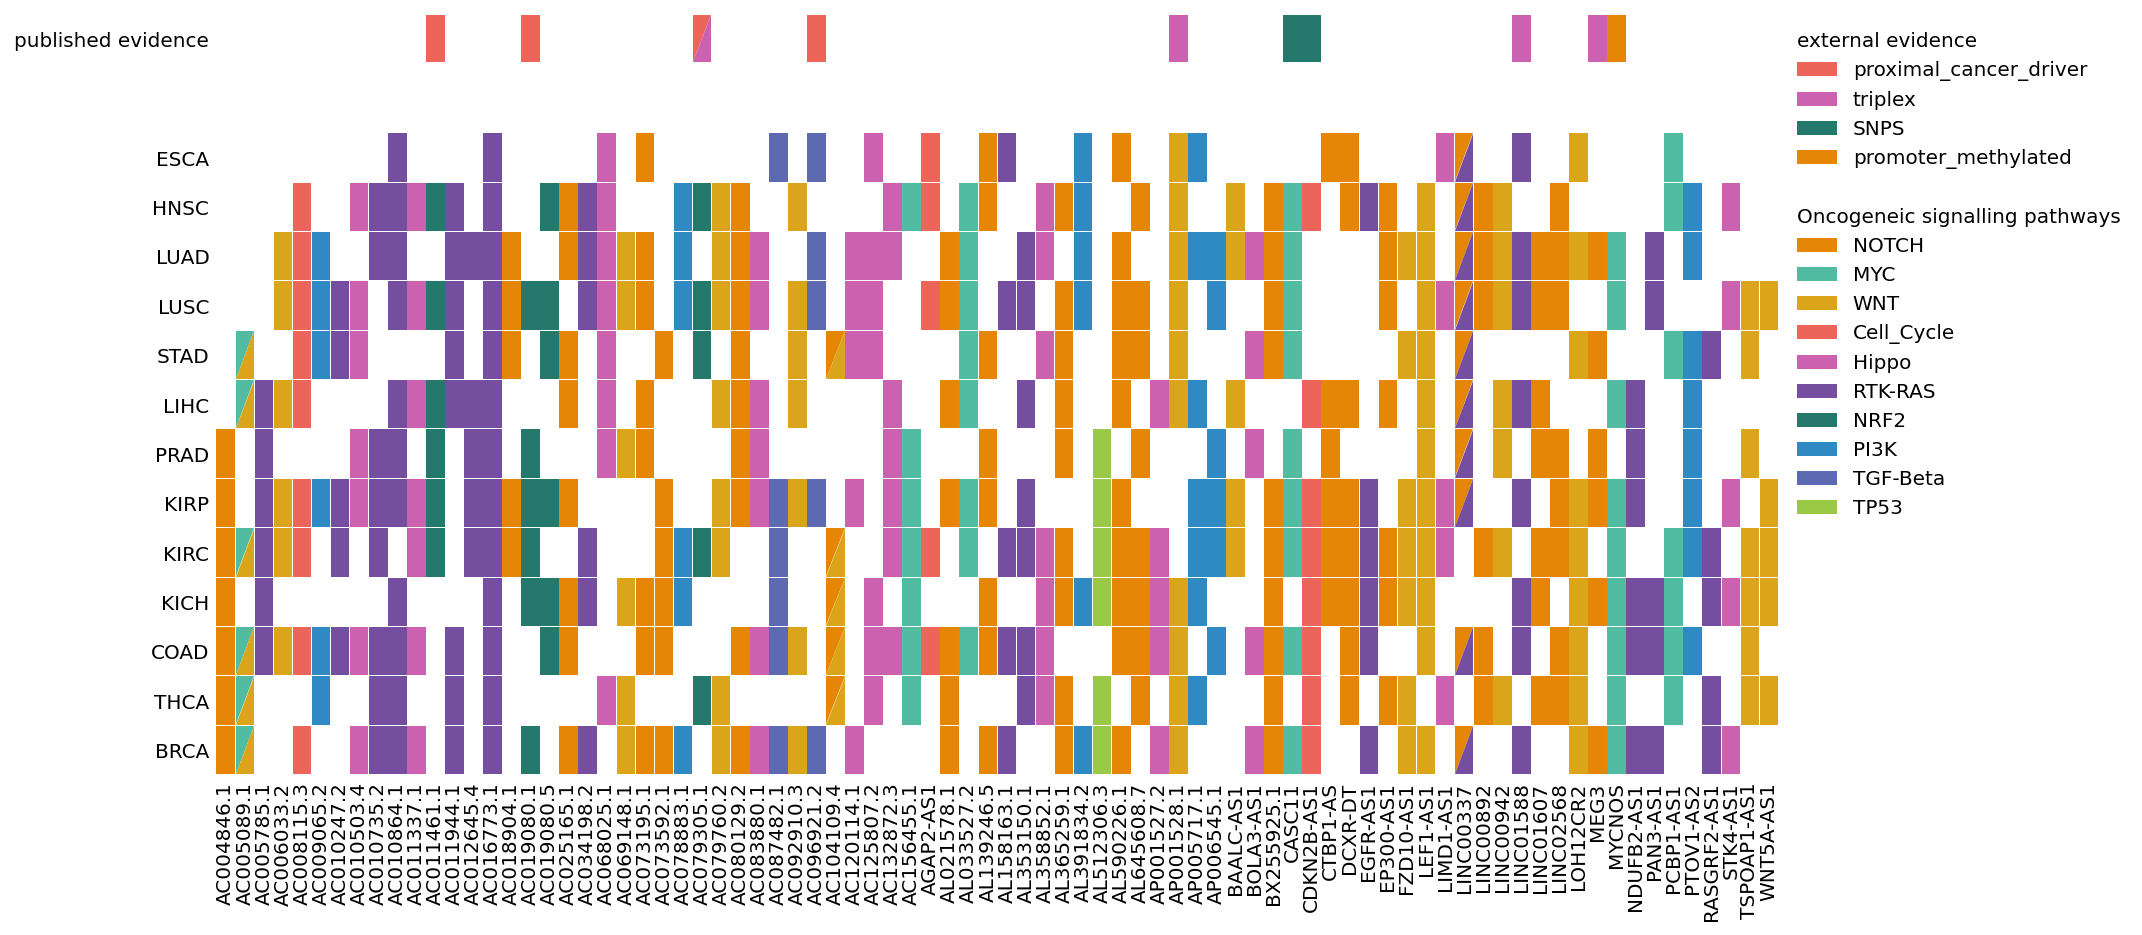

In [314]:
example_comut         = comut.CoMut()
example_comut.add_categorical_data(common_de_data_sorted, name = 'Oncogeneic signalling pathways',)
#example_comut.add_categorical_data(cancer_driver_plot, name ='cancer driver',mapping=driver)
example_comut.add_categorical_data(common_de_features, name ='external evidence',mapping=features)
# add bar data for promoter methylation
#example_comut.add_bar_data(mut_burden_df, name = 'Mutation burden', mapping = bar_mapping, stacked = True, bar_kwargs = bar_kwargs, 
                       #ylabel = 'Muts/Mb')

# add bar data for triplex score
#example_comut.add_bar_data(mut_burden_df, name = 'Mutation burden', mapping = bar_mapping, stacked = True, bar_kwargs = bar_kwargs, 
                       #ylabel = 'Muts/Mb')

figsize   = (14,7)
example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, figsize = figsize)
example_comut.add_unified_legend()
example_comut.figure.savefig('DEcommon_pathways&evidence_only'+ extension, dpi = dpi)


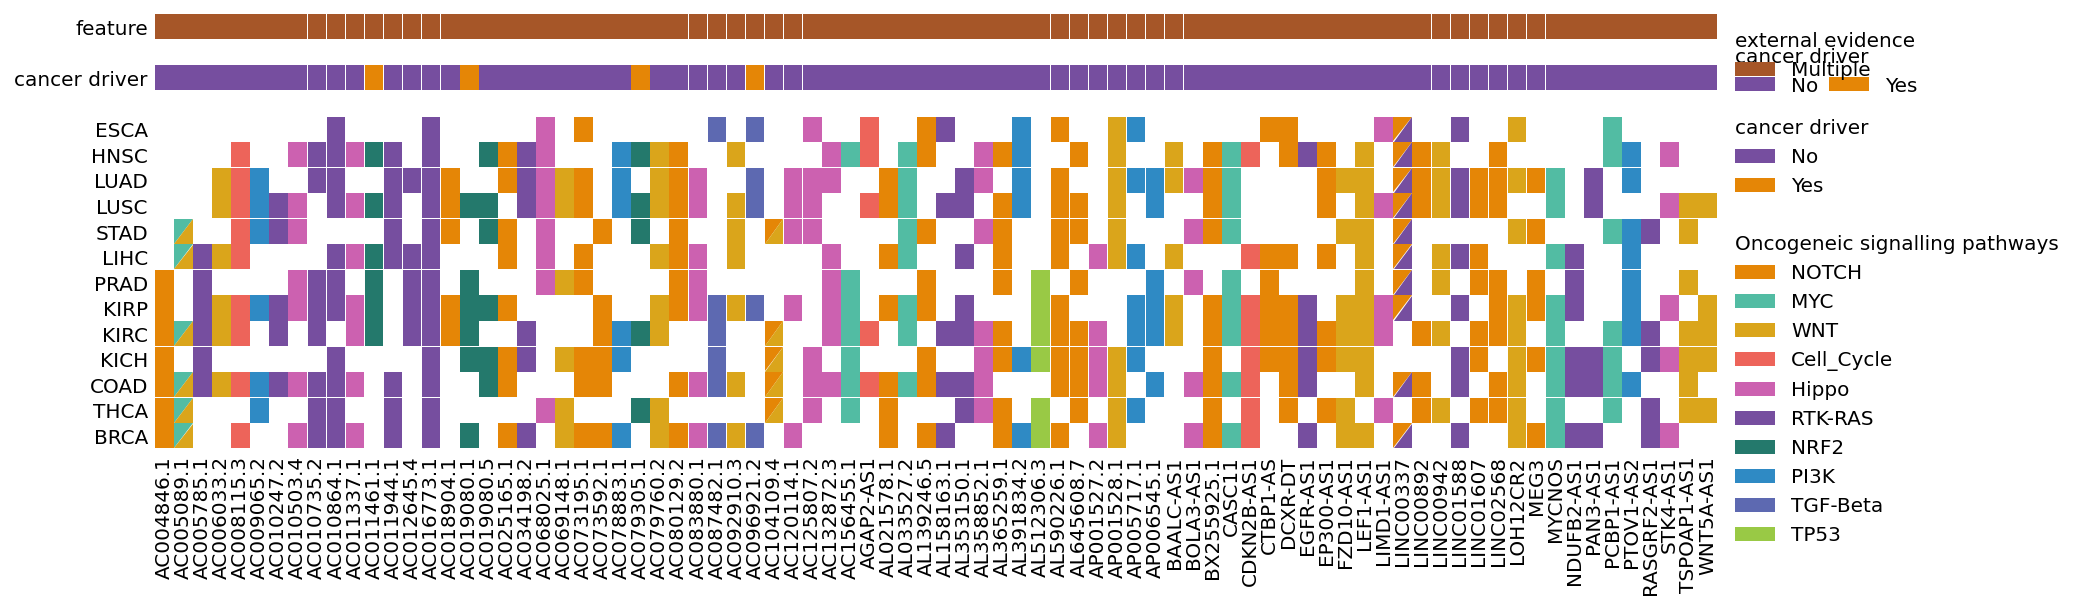

In [180]:
biopsy_leg = example_comut.add_axis_legend(name = 'cancer driver', bbox_to_anchor = (1, 2.4), title = 'cancer driver', ncol = 2, columnspacing = 0.5)
example_comut.figure

In [ ]:
# plot for common de accross all tumors and triplex

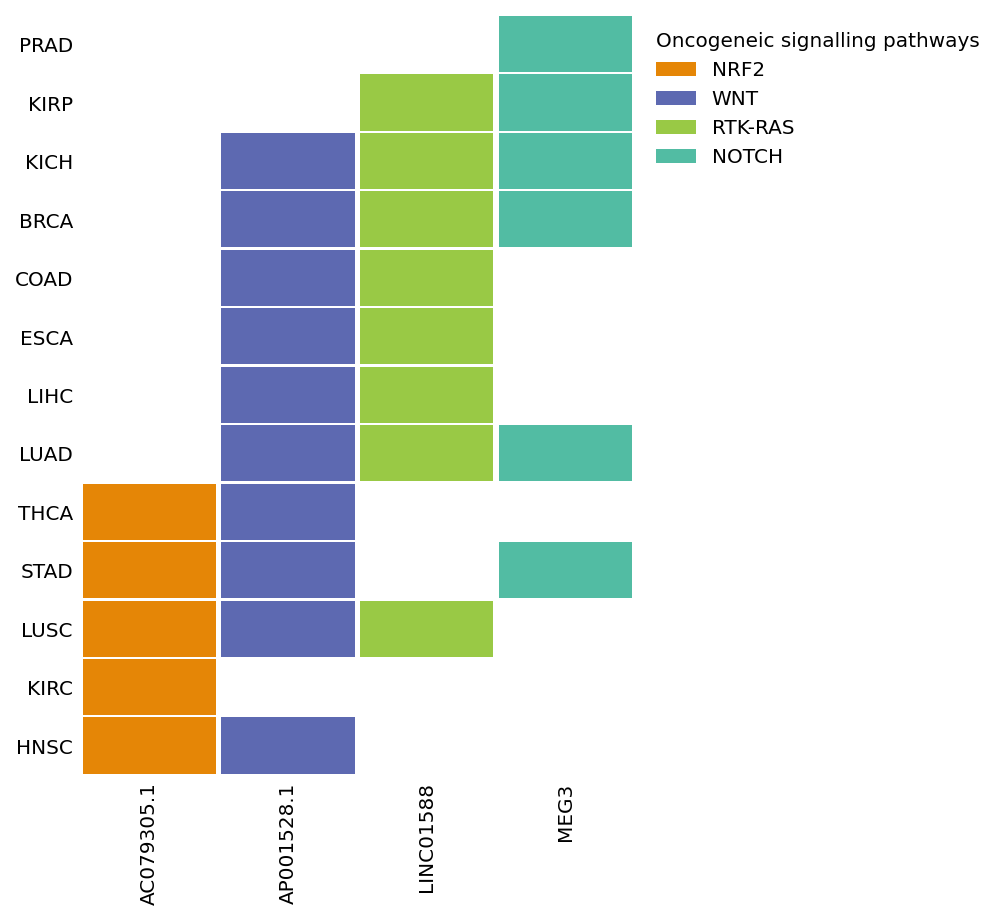

In [170]:
example_comut         = comut.CoMut()
example_comut.add_categorical_data(comon_de_triplex_sorted, name = 'Oncogeneic signalling pathways',)
figsize   = (5,7)
fig =example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, figsize = figsize)
example_comut.add_unified_legend()
example_comut.figure.savefig('DEcommon_triplex_pathways_only'+ extension, dpi = dpi)

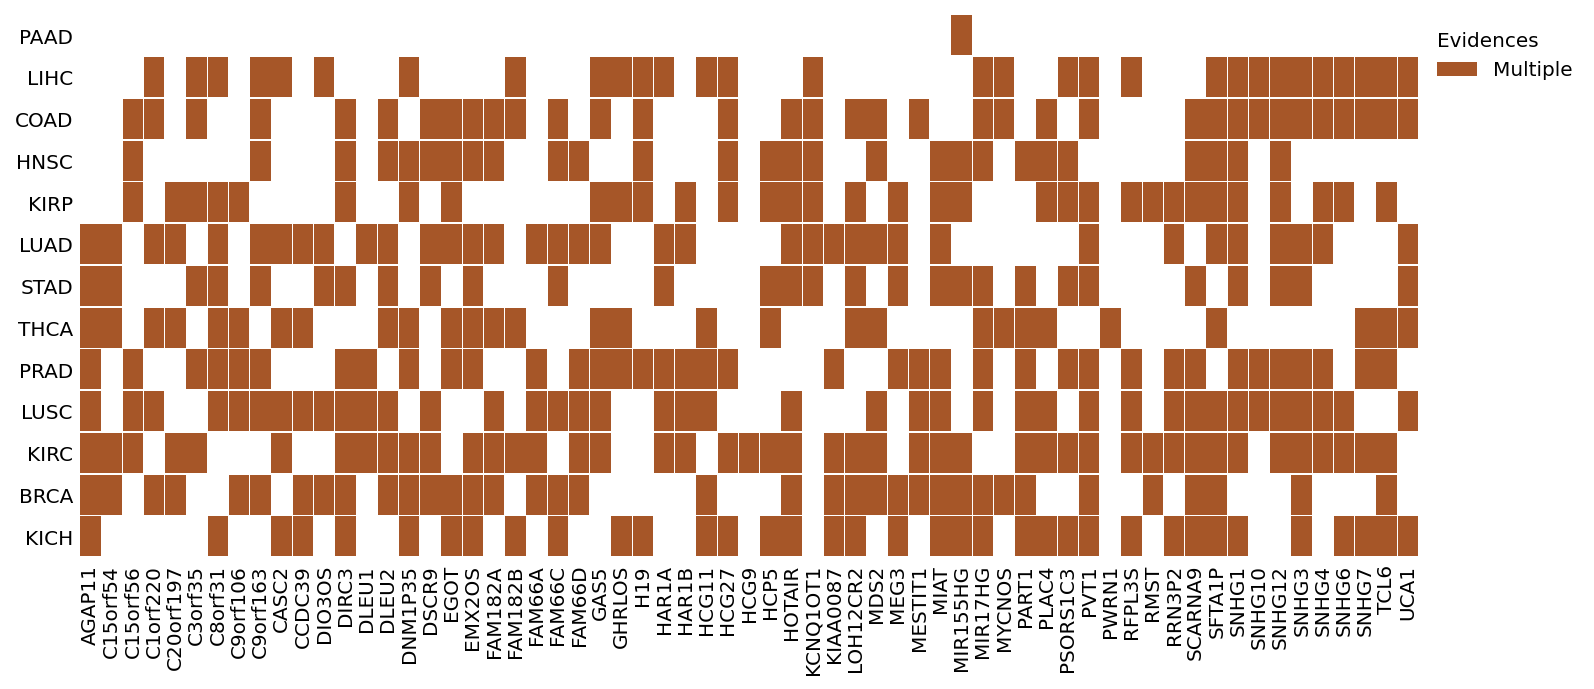

In [249]:
example_comut         = comut.CoMut()
example_comut.add_categorical_data(ccommon_de_melt_meth_sorted, name = 'Evidences')
figsize   = (12,5)#rc
fig =example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, figsize = figsize)
example_comut.add_unified_legend()
example_comut.figure.savefig('DEcommon_featues_only'+ extension, dpi = dpi)